In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import f
from datetime import datetime
from scipy.stats import chi2_contingency
from scipy.stats import chi2
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
plt.style.use('seaborn')

# EDA

In [3]:
df = pd.read_csv('kc_house_data_train.csv')

In [4]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [5]:
corr = df.corr()

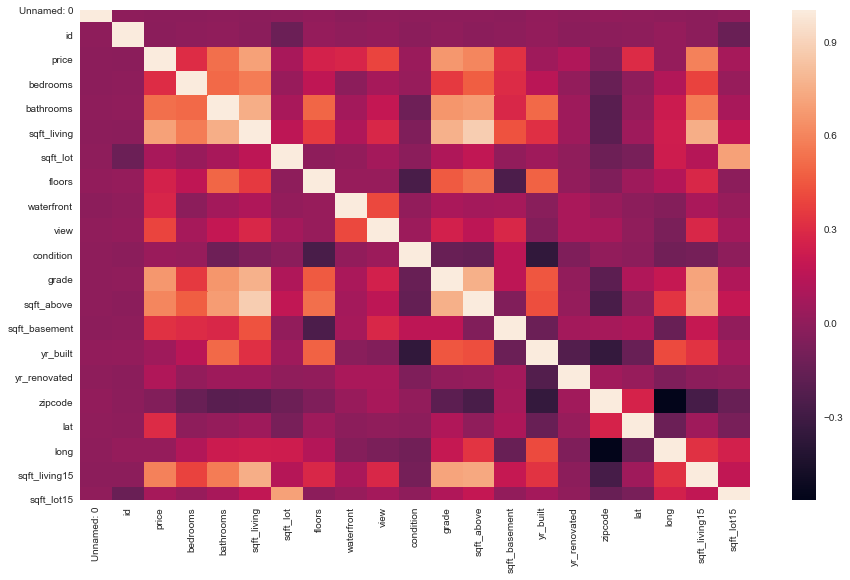

In [6]:
plt.figure(figsize=(15,9))
sns.heatmap(corr)


## Geoprice Feature

In [7]:
df['geolat'] = df['lat'].apply(lambda x: 1 if (x >47.5) & (x < 47.7) else 0)
df['geolong'] = df['long'].apply(lambda x: 1 if (x >-122.4) & (x < -122.0) else 0)                
df['geoprice'] = df.geolat + df.geolong



df.geoprice = np.where(df.geoprice == 2, 1, 0)

In [8]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,geolat,geolong,geoprice
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,0,1,0
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,1,1,1
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,1,1,1
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,1,1,1
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,1,1,1


In [9]:
model = ols('price~sqft_living+bedrooms', data=df).fit()

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     8949.
Date:                Thu, 20 Feb 2020   Prob (F-statistic):               0.00
Time:                        15:56:05   Log-Likelihood:            -2.4022e+05
No. Observations:               17290   AIC:                         4.805e+05
Df Residuals:                   17287   BIC:                         4.805e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.897e+04   7435.453      9.276      0.000    5.44e+04    8.35e+04
sqft_living   318.4894      2.634    120.926      0.000     313.327     323.652
bedrooms    -5.668e+04   2579.558    -21.973      0.000   -6.17e+04   -5.16e+04
==============================================================================
Omnibus:                    12019.532   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           456776.832
Skew:                           2.867   Prob(JB):                         0.00
Kurtosis:                      27.519   Cond. No.                     8.80e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
df['price_range'] = df['price'].apply(lambda x: 0 if x < 321000 else (1 if x < 645000 else 2))

/Users/braytonhall/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


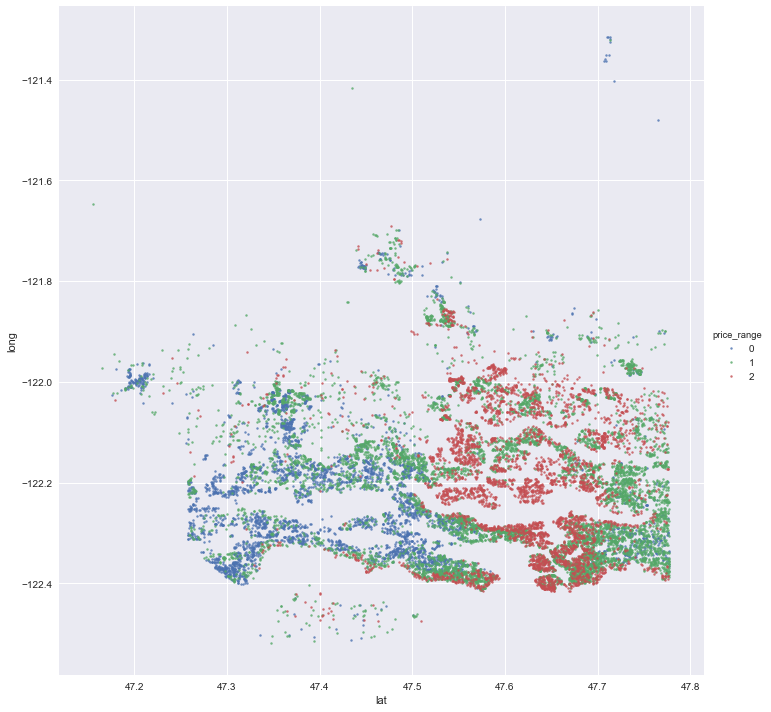

In [12]:
sns.lmplot(x = 'lat', y='long', data=df, hue = 'price_range', fit_reg = False, size=10, scatter_kws={"s": 6})
plt.show()

## Df Manip

In [13]:
df2 = df[['price', 'geoprice', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'yr_built', 'sqft_lot','grade', 'condition', 'zipcode', 'sqft_living15']]

In [14]:
df2

,price,geoprice,bedrooms,bathrooms,sqft_living,floors,waterfront,yr_built,sqft_lot,grade,condition,zipcode,sqft_living15
0,365000.0,0,4,2.25,2070,2.0,0,1986,8893,8,4,98058,2390
1,865000.0,1,5,3.00,2900,1.0,0,1977,6730,8,5,98115,2370
2,1038000.0,1,4,2.50,3770,2.0,0,1997,10893,11,3,98006,3710
3,1490000.0,1,3,3.50,4560,2.0,0,1990,14608,12,3,98034,4050
4,711000.0,1,3,2.50,2550,2.0,0,2004,5376,9,3,98052,2250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,750000.0,1,5,2.50,3240,1.0,0,1958,9960,8,3,98008,2730
17286,440000.0,1,2,1.75,1300,2.0,0,1948,4000,7,3,98105,1350
17287,310000.0,0,3,1.00,1050,1.0,0,1953,9876,7,3,98028,1760
17288,427500.0,0,3,1.50,1900,1.5,0,1971,43186,7,4,98038,2080


In [15]:
corr = df2.corr()

In [16]:
corr

,price,geoprice,bedrooms,bathrooms,sqft_living,floors,waterfront,yr_built,sqft_lot,grade,condition,zipcode,sqft_living15
price,1.000000,0.340267,0.305106,0.524335,0.703540,0.256985,0.275779,0.056450,0.086803,0.666215,0.036099,-0.048958,0.585567
geoprice,0.340267,1.000000,0.006613,0.044684,0.051100,0.098324,0.005894,-0.204491,-0.143533,0.128059,0.048028,0.121560,0.035454
bedrooms,0.305106,0.006613,1.000000,0.507867,0.570428,0.172975,-0.008581,0.153769,0.029375,0.354679,0.025266,-0.147515,0.387589
bathrooms,0.524335,0.044684,0.507867,1.000000,0.755270,0.497967,0.065848,0.507761,0.085470,0.664191,-0.122976,-0.201527,0.568080
sqft_living,0.703540,0.051100,0.570428,0.755270,1.000000,0.357169,0.109738,0.319397,0.166810,0.762929,-0.061530,-0.195893,0.755066
floors,0.256985,0.098324,0.172975,0.497967,0.357169,1.000000,0.025132,0.483657,-0.002205,0.458984,-0.259230,-0.060560,0.283933
waterfront,0.275779,0.005894,-0.008581,0.065848,0.109738,0.025132,1.000000,-0.021981,0.015356,0.092234,0.009608,0.034282,0.091090
yr_built,0.056450,-0.204491,0.153769,0.507761,0.319397,0.483657,-0.021981,1.000000,0.054228,0.448003,-0.358921,-0.348366,0.332340
sqft_lot,0.086803,-0.143533,0.029375,0.085470,0.166810,-0.002205,0.015356,0.054228,1.000000,0.110320,-0.013715,-0.126590,0.136959
grade,0.666215,0.128059,0.354679,0.664191,0.762929,0.458984,0.092234,0.448003,0.110320,1.000000,-0.142066,-0.184946,0.715745


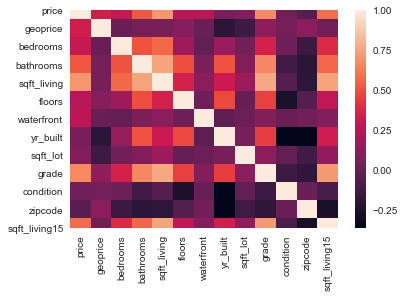

In [17]:
sns.heatmap(corr)

In [18]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,geolat,geolong,geoprice,price_range
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,0,1,0,1
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,1,1,1,2
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,1,1,1,2
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,1,1,1,2
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,1,1,1,2


## Zipcode Dummies

In [19]:
zipdum = pd.get_dummies(df2.zipcode)
zipdum

,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17286,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17287,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17288,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
df3 = pd.concat([df2, zipdum], axis='columns')

df3 = df3.drop(columns='zipcode', axis=1)

In [21]:
df3

,price,geoprice,bedrooms,bathrooms,sqft_living,floors,waterfront,yr_built,sqft_lot,grade,condition,sqft_living15,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,365000.0,0,4,2.25,2070,2.0,0,1986,8893,8,4,2390,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,865000.0,1,5,3.00,2900,1.0,0,1977,6730,8,5,2370,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1038000.0,1,4,2.50,3770,2.0,0,1997,10893,11,3,3710,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1490000.0,1,3,3.50,4560,2.0,0,1990,14608,12,3,4050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,711000.0,1,3,2.50,2550,2.0,0,2004,5376,9,3,2250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,750000.0,1,5,2.50,3240,1.0,0,1958,9960,8,3,2730,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17286,440000.0,1,2,1.75,1300,2.0,0,1948,4000,7,3,1350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17287,310000.0,0,3,1.00,1050,1.0,0,1953,9876,7,3,1760,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17288,427500.0,0,3,1.50,1900,1.5,0,1971,43186,7,4,2080,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
df3.columns = df3.columns.astype(str)

In [23]:
df3

,price,geoprice,bedrooms,bathrooms,sqft_living,floors,waterfront,yr_built,sqft_lot,grade,condition,sqft_living15,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,365000.0,0,4,2.25,2070,2.0,0,1986,8893,8,4,2390,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,865000.0,1,5,3.00,2900,1.0,0,1977,6730,8,5,2370,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1038000.0,1,4,2.50,3770,2.0,0,1997,10893,11,3,3710,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1490000.0,1,3,3.50,4560,2.0,0,1990,14608,12,3,4050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,711000.0,1,3,2.50,2550,2.0,0,2004,5376,9,3,2250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,750000.0,1,5,2.50,3240,1.0,0,1958,9960,8,3,2730,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17286,440000.0,1,2,1.75,1300,2.0,0,1948,4000,7,3,1350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17287,310000.0,0,3,1.00,1050,1.0,0,1953,9876,7,3,1760,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17288,427500.0,0,3,1.50,1900,1.5,0,1971,43186,7,4,2080,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
df4 = df3.drop(columns=['waterfront', '98001'])

In [25]:
regcol = df3.columns[:12]
regcol


Index(['price', 'geoprice', 'bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'waterfront', 'yr_built', 'sqft_lot', 'grade', 'condition',
       'sqft_living15'],
      dtype='object')

In [26]:
regcol2 = list(regcol)

In [27]:
regcol2

['price',
 'geoprice',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'waterfront',
 'yr_built',
 'sqft_lot',
 'grade',
 'condition',
 'sqft_living15']

In [28]:
regcol2.remove('waterfront')
regcol2.remove('price')

In [29]:
regcol2

['geoprice',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'yr_built',
 'sqft_lot',
 'grade',
 'condition',
 'sqft_living15']

In [30]:
zipcolfix = []
for i in df3.columns[12:]:
    zipcolfix.append('Q("' + i + '")')

In [31]:
zipcolfix.remove('Q("98001")')

In [32]:
fin_zip_col = list(regcol2) + list(zipcolfix)

In [33]:
fin_zip_col

['geoprice',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'yr_built',
 'sqft_lot',
 'grade',
 'condition',
 'sqft_living15',
 'Q("98002")',
 'Q("98003")',
 'Q("98004")',
 'Q("98005")',
 'Q("98006")',
 'Q("98007")',
 'Q("98008")',
 'Q("98010")',
 'Q("98011")',
 'Q("98014")',
 'Q("98019")',
 'Q("98022")',
 'Q("98023")',
 'Q("98024")',
 'Q("98027")',
 'Q("98028")',
 'Q("98029")',
 'Q("98030")',
 'Q("98031")',
 'Q("98032")',
 'Q("98033")',
 'Q("98034")',
 'Q("98038")',
 'Q("98039")',
 'Q("98040")',
 'Q("98042")',
 'Q("98045")',
 'Q("98052")',
 'Q("98053")',
 'Q("98055")',
 'Q("98056")',
 'Q("98058")',
 'Q("98059")',
 'Q("98065")',
 'Q("98070")',
 'Q("98072")',
 'Q("98074")',
 'Q("98075")',
 'Q("98077")',
 'Q("98092")',
 'Q("98102")',
 'Q("98103")',
 'Q("98105")',
 'Q("98106")',
 'Q("98107")',
 'Q("98108")',
 'Q("98109")',
 'Q("98112")',
 'Q("98115")',
 'Q("98116")',
 'Q("98117")',
 'Q("98118")',
 'Q("98119")',
 'Q("98122")',
 'Q("98125")',
 'Q("98126")',
 'Q("98133")',
 'Q("98136

## Model Creation

In [34]:
outcome = 'price'
predictors = fin_zip_col
pred_sum = '+'.join(fin_zip_col)
formula = outcome + '~' + pred_sum

In [35]:
formula

'price~geoprice+bedrooms+bathrooms+sqft_living+floors+yr_built+sqft_lot+grade+condition+sqft_living15+Q("98002")+Q("98003")+Q("98004")+Q("98005")+Q("98006")+Q("98007")+Q("98008")+Q("98010")+Q("98011")+Q("98014")+Q("98019")+Q("98022")+Q("98023")+Q("98024")+Q("98027")+Q("98028")+Q("98029")+Q("98030")+Q("98031")+Q("98032")+Q("98033")+Q("98034")+Q("98038")+Q("98039")+Q("98040")+Q("98042")+Q("98045")+Q("98052")+Q("98053")+Q("98055")+Q("98056")+Q("98058")+Q("98059")+Q("98065")+Q("98070")+Q("98072")+Q("98074")+Q("98075")+Q("98077")+Q("98092")+Q("98102")+Q("98103")+Q("98105")+Q("98106")+Q("98107")+Q("98108")+Q("98109")+Q("98112")+Q("98115")+Q("98116")+Q("98117")+Q("98118")+Q("98119")+Q("98122")+Q("98125")+Q("98126")+Q("98133")+Q("98136")+Q("98144")+Q("98146")+Q("98148")+Q("98155")+Q("98166")+Q("98168")+Q("98177")+Q("98178")+Q("98188")+Q("98198")+Q("98199")'

In [36]:
modelzip = ols(formula, data=df3).fit()

In [37]:
modelzip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     679.7
Date:                Thu, 20 Feb 2020   Prob (F-statistic):               0.00
Time:                        15:56:07   Log-Likelihood:            -2.3413e+05
No. Observations:               17290   AIC:                         4.684e+05
Df Residuals:                   17210   BIC:                         4.690e+05
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.081e+06   1.52e+05     13.675      0.000    1.78e+06    2.38e+06
geoprice       2.749e+04   6213.677      4.425      0.000    1.53e+04    3.97e+04
bedrooms       -3.96e+04   1912.577    -20.703      0.000   -4.33e+04   -3.58e+04
bathrooms      2.581e+04   3294.456      7.835      0.000    1.94e+04    3.23e+04
sqft_living     197.9740      3.444     57.491      0.000     191.224     204.724
floors        -1.347e+04   3525.461     -3.821      0.000   -2.04e+04   -6559.686
yr_built      -1376.9589     78.112    -17.628      0.000   -1530.067   -1223.851
sqft_lot          0.1949      0.036      5.346      0.000       0.123       0.266
grade          7.134e+04   2278.553     31.308      0.000    6.69e+04    7.58e+04
condition      2.097e+04   2410.820      8.698      0.000    1.62e+04    2.57e+04
sqft_living15    31.9606      3.617      8.837      0.000      24.872      39.050
Q("98002")     3.746e+04   1.84e+04      2.037      0.042    1413.075    7.35e+04
Q("98003")    -2.313e+04   1.65e+04     -1.403      0.161   -5.55e+04    9183.695
Q("98004")     7.323e+05   1.76e+04     41.634      0.000    6.98e+05    7.67e+05
Q("98005")     2.186e+05   2.02e+04     10.828      0.000    1.79e+05    2.58e+05
Q("98006")     2.121e+05   1.59e+04     13.303      0.000    1.81e+05    2.43e+05
Q("98007")     1.944e+05    2.1e+04      9.279      0.000    1.53e+05    2.36e+05
Q("98008")     2.406e+05   1.76e+04     13.650      0.000    2.06e+05    2.75e+05
Q("98010")     6.096e+04   2.41e+04      2.529      0.011    1.37e+04    1.08e+05
Q("98011")     1.025e+05   1.82e+04      5.649      0.000     6.7e+04    1.38e+05
Q("98014")       9.8e+04   2.16e+04      4.538      0.000    5.57e+04     1.4e+05
Q("98019")     7.153e+04   1.89e+04      3.789      0.000    3.45e+04    1.09e+05
Q("98022")     1.694e+04   1.74e+04      0.972      0.331   -1.72e+04    5.11e+04
Q("98023")    -3.842e+04   1.42e+04     -2.697      0.007   -6.63e+04   -1.05e+04
Q("98024")     1.543e+05   2.56e+04      6.029      0.000    1.04e+05    2.04e+05
Q("98027")     1.177e+05   1.56e+04      7.559      0.000    8.72e+04    1.48e+05
Q("98028")     1.075e+05   1.66e+04      6.474      0.000    7.49e+04     1.4e+05
Q("98029")     1.669e+05   1.65e+04     10.121      0.000    1.35e+05    1.99e+05
Q("98030")    -4267.4877    1.7e+04     -0.251      0.802   -3.76e+04    2.91e+04
Q("98031")     2076.0061   1.67e+04      0.124      0.901   -3.06e+04    3.48e+04
Q("98032")     4668.2200   2.12e+04      0.220      0.826   -3.69e+04    4.63e+04
Q("98033")     3.258e+05   1.58e+04     20.599      0.000    2.95e+05    3.57e+05
Q("98034")     2.027e+05   1.41e+04     14.395      0.000    1.75e+05     2.3e+05
Q("98038")     2.383e+04    1.4e+04      1.701      0.089   -3626.304    5.13e+04
Q("98039")     1.281e+06   3.14e+04     40.826   

# Testing

In [38]:
testing = pd.read_csv('kc_house_data_test_features.csv')

In [39]:
testing

,Unnamed: 0,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,1974300020,20140827T000000,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918
1,1,1974300020,20150218T000000,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918
2,2,3630020380,20141107T000000,3,2.50,1470,1779,2.0,0,0,3,8,1160,310,2005,0,98029,47.5472,-121.998,1470,1576
3,3,1771000290,20141203T000000,3,1.75,1280,16200,1.0,0,0,3,8,1030,250,1976,0,98077,47.7427,-122.071,1160,10565
4,4,5126310470,20150115T000000,4,2.75,2830,8126,2.0,0,0,3,8,2830,0,2005,0,98059,47.4863,-122.140,2830,7916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4318,4318,263000018,20140521T000000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
4319,4319,6600060120,20150223T000000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
4320,4320,1523300141,20140623T000000,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
4321,4321,291310100,20150116T000000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [40]:
testing['geolat'] = testing['lat'].apply(lambda x: 1 if (x >47.5) & (x < 47.7) else 0)
testing['geolong'] = testing['long'].apply(lambda x: 1 if (x >-122.4) & (x < -122.0) else 0)                
testing['geoprice'] = testing.geolat + testing.geolong



testing.geoprice = np.where(testing.geoprice == 2, 1, 0)

In [41]:
testing2 = testing[['geoprice', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'yr_built', 'sqft_lot','grade', 'condition', 'zipcode', 'sqft_living15']]

In [42]:
zipdumtest = pd.get_dummies(testing2.zipcode)

In [43]:
testing3 = pd.concat([testing2, zipdumtest], axis=1)

testing3 = testing3.drop(columns='zipcode', axis=1)

In [44]:
testing3

,geoprice,bedrooms,bathrooms,sqft_living,floors,waterfront,yr_built,sqft_lot,grade,condition,sqft_living15,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0,4,2.50,2270,1.0,0,1967,11500,8,3,2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,4,2.50,2270,1.0,0,1967,11500,8,3,2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,3,2.50,1470,2.0,0,2005,1779,8,3,1470,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,3,1.75,1280,1.0,0,1976,16200,8,3,1160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,4,2.75,2830,2.0,0,2005,8126,8,3,2830,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4318,1,3,2.50,1530,3.0,0,2009,1131,8,3,1530,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4319,1,4,2.50,2310,2.0,0,2014,5813,8,3,1830,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4320,1,2,0.75,1020,2.0,0,2009,1350,7,3,1020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4321,1,3,2.50,1600,2.0,0,2004,2388,8,3,1410,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
testing3.columns = testing3.columns.astype(str)

In [46]:
regcoltest = testing3.columns[:11]

In [47]:
regcoltest2 = list(regcoltest)

In [48]:
regcoltest2

['geoprice',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'waterfront',
 'yr_built',
 'sqft_lot',
 'grade',
 'condition',
 'sqft_living15']

In [49]:
regcoltest2.remove('waterfront')

In [50]:
regcoltest2

['geoprice',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'yr_built',
 'sqft_lot',
 'grade',
 'condition',
 'sqft_living15']

In [51]:
zipcoltestfix = []
for i in testing3.columns[11:]:
    zipcoltestfix.append('Q("' + i + '")')

In [52]:
zipcoltestfix

['Q("98001")',
 'Q("98002")',
 'Q("98003")',
 'Q("98004")',
 'Q("98005")',
 'Q("98006")',
 'Q("98007")',
 'Q("98008")',
 'Q("98010")',
 'Q("98011")',
 'Q("98014")',
 'Q("98019")',
 'Q("98022")',
 'Q("98023")',
 'Q("98024")',
 'Q("98027")',
 'Q("98028")',
 'Q("98029")',
 'Q("98030")',
 'Q("98031")',
 'Q("98032")',
 'Q("98033")',
 'Q("98034")',
 'Q("98038")',
 'Q("98039")',
 'Q("98040")',
 'Q("98042")',
 'Q("98045")',
 'Q("98052")',
 'Q("98053")',
 'Q("98055")',
 'Q("98056")',
 'Q("98058")',
 'Q("98059")',
 'Q("98065")',
 'Q("98070")',
 'Q("98072")',
 'Q("98074")',
 'Q("98075")',
 'Q("98077")',
 'Q("98092")',
 'Q("98102")',
 'Q("98103")',
 'Q("98105")',
 'Q("98106")',
 'Q("98107")',
 'Q("98108")',
 'Q("98109")',
 'Q("98112")',
 'Q("98115")',
 'Q("98116")',
 'Q("98117")',
 'Q("98118")',
 'Q("98119")',
 'Q("98122")',
 'Q("98125")',
 'Q("98126")',
 'Q("98133")',
 'Q("98136")',
 'Q("98144")',
 'Q("98146")',
 'Q("98148")',
 'Q("98155")',
 'Q("98166")',
 'Q("98168")',
 'Q("98177")',
 'Q("98178

In [53]:
zipcoltestfix.remove('Q("98001")')

In [54]:
fin_zip_col_test = list(regcoltest2) + list(zipcoltestfix)

In [55]:
fin_zip_col_test

['geoprice',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'yr_built',
 'sqft_lot',
 'grade',
 'condition',
 'sqft_living15',
 'Q("98002")',
 'Q("98003")',
 'Q("98004")',
 'Q("98005")',
 'Q("98006")',
 'Q("98007")',
 'Q("98008")',
 'Q("98010")',
 'Q("98011")',
 'Q("98014")',
 'Q("98019")',
 'Q("98022")',
 'Q("98023")',
 'Q("98024")',
 'Q("98027")',
 'Q("98028")',
 'Q("98029")',
 'Q("98030")',
 'Q("98031")',
 'Q("98032")',
 'Q("98033")',
 'Q("98034")',
 'Q("98038")',
 'Q("98039")',
 'Q("98040")',
 'Q("98042")',
 'Q("98045")',
 'Q("98052")',
 'Q("98053")',
 'Q("98055")',
 'Q("98056")',
 'Q("98058")',
 'Q("98059")',
 'Q("98065")',
 'Q("98070")',
 'Q("98072")',
 'Q("98074")',
 'Q("98075")',
 'Q("98077")',
 'Q("98092")',
 'Q("98102")',
 'Q("98103")',
 'Q("98105")',
 'Q("98106")',
 'Q("98107")',
 'Q("98108")',
 'Q("98109")',
 'Q("98112")',
 'Q("98115")',
 'Q("98116")',
 'Q("98117")',
 'Q("98118")',
 'Q("98119")',
 'Q("98122")',
 'Q("98125")',
 'Q("98126")',
 'Q("98133")',
 'Q("98136

In [56]:
testing3 = testing3.drop(columns='98001', axis=1)

In [57]:
testing3

,geoprice,bedrooms,bathrooms,sqft_living,floors,waterfront,yr_built,sqft_lot,grade,condition,sqft_living15,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0,4,2.50,2270,1.0,0,1967,11500,8,3,2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,4,2.50,2270,1.0,0,1967,11500,8,3,2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,3,2.50,1470,2.0,0,2005,1779,8,3,1470,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,3,1.75,1280,1.0,0,1976,16200,8,3,1160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,4,2.75,2830,2.0,0,2005,8126,8,3,2830,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4318,1,3,2.50,1530,3.0,0,2009,1131,8,3,1530,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4319,1,4,2.50,2310,2.0,0,2014,5813,8,3,1830,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4320,1,2,0.75,1020,2.0,0,2009,1350,7,3,1020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4321,1,3,2.50,1600,2.0,0,2004,2388,8,3,1410,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
testing3.columns

Index(['geoprice', 'bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'waterfront', 'yr_built', 'sqft_lot', 'grade', 'condition',
       'sqft_living15', '98002', '98003', '98004', '98005', '98006', '98007',
       '98008', '98010', '98011', '98014', '98019', '98022', '98023', '98024',
       '98027', '98028', '98029', '98030', '98031', '98032', '98033', '98034',
       '98038', '98039', '98040', '98042', '98045', '98052', '98053', '98055',
       '98056', '98058', '98059', '98065', '98070', '98072', '98074', '98075',
       '98077', '98092', '98102', '98103', '98105', '98106', '98107', '98108',
       '98109', '98112', '98115', '98116', '98117', '98118', '98119', '98122',
       '98125', '98126', '98133', '98136', '98144', '98146', '98148', '98155',
       '98166', '98168', '98177', '98178', '98188', '98198', '98199'],
      dtype='object')

In [59]:
df3.columns

Index(['price', 'geoprice', 'bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'waterfront', 'yr_built', 'sqft_lot', 'grade', 'condition',
       'sqft_living15', '98001', '98002', '98003', '98004', '98005', '98006',
       '98007', '98008', '98010', '98011', '98014', '98019', '98022', '98023',
       '98024', '98027', '98028', '98029', '98030', '98031', '98032', '98033',
       '98034', '98038', '98039', '98040', '98042', '98045', '98052', '98053',
       '98055', '98056', '98058', '98059', '98065', '98070', '98072', '98074',
       '98075', '98077', '98092', '98102', '98103', '98105', '98106', '98107',
       '98108', '98109', '98112', '98115', '98116', '98117', '98118', '98119',
       '98122', '98125', '98126', '98133', '98136', '98144', '98146', '98148',
       '98155', '98166', '98168', '98177', '98178', '98188', '98198', '98199'],
      dtype='object')

In [60]:
guesses = modelzip.predict(testing3)

# Model Evaluation

In [61]:
len(guesses)

4323

In [62]:
guesses.mean()

563754.6288344912

In [63]:
guesses.std()

323381.79030580557

In [64]:
guesses.median()

505666.4395439946

In [65]:
df.price.mean()

540739.5486408329

In [66]:
df.price.std()

373318.97874928213

In [67]:
df.price.median()

450000.0

In [68]:
type(guesses)

pandas.core.series.Series

In [69]:
guesses.to_csv('housing_preds_BH.csv', index=False)

/Users/braytonhall/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [70]:
guesses

0       618001.692310
1       618001.692310
2       378088.627341
3       269561.281290
4       554844.671712
            ...      
4318    520481.120507
4319    488439.816374
4320    297692.297373
4321    381725.989296
4322    299015.862772
Length: 4323, dtype: float64

In [71]:
guessesplot = pd.DataFrame(guesses)
guessesplot.columns = ['testz']
guessesplot

,testz
0,618001.692310
1,618001.692310
2,378088.627341
3,269561.281290
4,554844.671712
...,...
4318,520481.120507
4319,488439.816374
4320,297692.297373
4321,381725.989296


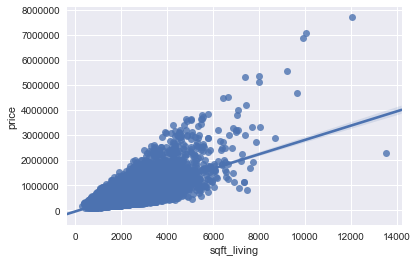

In [72]:
sns.regplot(df.sqft_living, df.price)

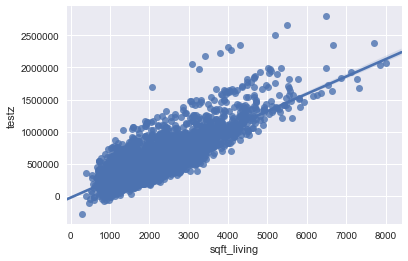

In [73]:
sns.regplot(testing.sqft_living, guessesplot.testz)

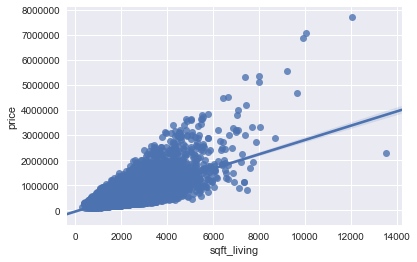

In [74]:
sns.regplot(df.sqft_living, df.price)

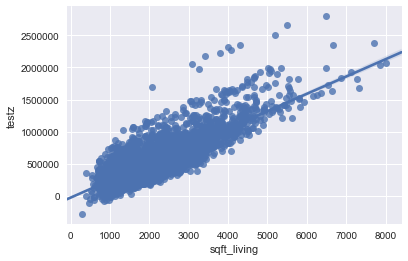

In [75]:
sns.regplot(testing3.sqft_living, guessesplot.testz)

In [76]:
df4

,price,geoprice,bedrooms,bathrooms,sqft_living,floors,yr_built,sqft_lot,grade,condition,sqft_living15,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,365000.0,0,4,2.25,2070,2.0,1986,8893,8,4,2390,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,865000.0,1,5,3.00,2900,1.0,1977,6730,8,5,2370,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1038000.0,1,4,2.50,3770,2.0,1997,10893,11,3,3710,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1490000.0,1,3,3.50,4560,2.0,1990,14608,12,3,4050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,711000.0,1,3,2.50,2550,2.0,2004,5376,9,3,2250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,750000.0,1,5,2.50,3240,1.0,1958,9960,8,3,2730,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17286,440000.0,1,2,1.75,1300,2.0,1948,4000,7,3,1350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17287,310000.0,0,3,1.00,1050,1.0,1953,9876,7,3,1760,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17288,427500.0,0,3,1.50,1900,1.5,1971,43186,7,4,2080,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [77]:
features = df4.drop(columns='price', axis=1)
features

,geoprice,bedrooms,bathrooms,sqft_living,floors,yr_built,sqft_lot,grade,condition,sqft_living15,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0,4,2.25,2070,2.0,1986,8893,8,4,2390,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,5,3.00,2900,1.0,1977,6730,8,5,2370,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,4,2.50,3770,2.0,1997,10893,11,3,3710,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,3,3.50,4560,2.0,1990,14608,12,3,4050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,3,2.50,2550,2.0,2004,5376,9,3,2250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,1,5,2.50,3240,1.0,1958,9960,8,3,2730,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17286,1,2,1.75,1300,2.0,1948,4000,7,3,1350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17287,0,3,1.00,1050,1.0,1953,9876,7,3,1760,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17288,0,3,1.50,1900,1.5,1971,43186,7,4,2080,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [78]:
target = df4['price']
target

0         365000.0
1         865000.0
2        1038000.0
3        1490000.0
4         711000.0
           ...    
17285     750000.0
17286     440000.0
17287     310000.0
17288     427500.0
17289     348000.0
Name: price, Length: 17290, dtype: float64

In [79]:
from sklearn.model_selection import train_test_split

#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0,test_size=0.2)

In [80]:
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13832, 79) Target:  (13832,)
Training set - Features:  (3458, 79) Target:  (3458,)


In [81]:
# fit a model
from sklearn import linear_model

#instantiate a linear regression object
lm = linear_model.LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)


print(lm.intercept_)
print(lm.coef_)

2048481.4185371636
[ 2.81292364e+04 -3.67831021e+04  2.44147758e+04  1.94171269e+02
 -1.22729339e+04 -1.35730244e+03  1.93278820e-01  6.98420462e+04
  2.07754333e+04  3.41831429e+01  3.90545763e+04 -9.27303484e+03
  7.31425613e+05  2.15538959e+05  2.15367330e+05  1.98152301e+05
  2.43031749e+05  6.14213076e+04  9.71408973e+04  9.11460962e+04
  6.84865708e+04  1.93625833e+04 -4.09510766e+04  1.54696066e+05
  1.19620568e+05  1.12012558e+05  1.70673063e+05 -7.06766738e+03
 -1.91424407e+03  4.16780422e+03  3.28181360e+05  1.95434346e+05
  2.56790829e+04  1.17340432e+06  4.62646053e+05  9.92819429e+03
  9.71008033e+04  1.81031258e+05  1.64550348e+05  3.97154339e+04
  8.04927871e+04  1.96511237e+04  6.24158310e+04  8.14787573e+04
  1.49619186e+05  1.30414399e+05  1.27174493e+05  1.61469874e+05
  7.92010525e+04 -4.61737533e+04  4.41542102e+05  2.85277578e+05
  4.06114876e+05  1.10464448e+05  2.98452183e+05  7.38857308e+04
  4.34586520e+05  5.38188421e+05  2.70500057e+05  2.72516347e+05
  2.72

In [82]:
print ("R^2 Score:", lm.score(X_train, y_train))


R^2 Score: 0.7546475946794703


In [83]:
y_train_pred = lm.predict(X_train)

In [84]:
#import the metrics module from sklearn
from sklearn import metrics

train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 104394.94507267897
Mean Squared Error: 33281192286.02351
Root Mean Squared Error: 182431.33581165137


In [85]:
price_std = target.std()

print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

Mean Absolute Error: 0.27964006925774254
Root Mean Squared Error: 0.48867415319425994


In [ ]:
y_pred = lm.predict(X_test)
y_pred

In [ ]:
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

In [ ]:
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

In [ ]:
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

In [88]:
guesses.describe()

count    4.323000e+03
mean     5.637546e+05
std      3.233818e+05
min     -2.753568e+05
25%      3.475863e+05
50%      5.056664e+05
75%      7.022925e+05
max      2.794886e+06
dtype: float64

In [89]:
samp = np.random.randint(0,100,1000)

In [90]:
samp

array([55, 85, 86, 57,  8, 84, 54, 61, 85, 90, 92, 11, 83, 53, 89, 34, 37,
        2, 99, 33, 46,  1, 79, 62,  8,  9, 85, 27, 86, 43, 73, 81, 87,  6,
       66, 25, 23,  3, 63, 34, 23, 50, 36, 41, 42, 22, 43, 10, 78, 68, 82,
       19, 54,  0, 39, 85,  3, 62, 76, 52, 31, 66, 21, 94, 43, 12, 41, 82,
       78, 23, 36, 65, 96, 61,  2, 59, 87, 53, 82,  3,  0, 79,  2, 87, 87,
       83, 56, 75, 22, 63,  4, 69, 99, 39, 91, 46, 69, 93, 18, 43, 82, 32,
       96, 41, 67, 62, 25, 23, 91, 53, 20, 94, 97, 65, 40, 69,  2, 56, 98,
       89, 26, 96, 87, 67, 80, 20, 52, 40,  0, 41,  4, 56,  0, 49,  7, 73,
       48, 52, 87,  4, 49, 41, 91, 33,  4, 89, 27, 32, 73,  0, 15,  1, 64,
       91, 25, 50,  6, 16, 19, 85, 63, 25, 26,  0, 65, 28,  5, 92, 61, 48,
       50, 33, 50, 77, 55, 50, 59,  6, 77, 72, 66, 31, 76, 53, 68, 81, 21,
       44,  2, 81, 95, 59, 10, 26, 53, 96, 62, 32, 32, 78, 72, 73, 39, 47,
       35, 17, 72, 59, 21, 37, 47, 59, 84, 97,  7, 40, 25, 46, 19, 25, 92,
       28, 70, 83, 40,  8

In [99]:
means = []
for i in range(0,1000):
    means.append(np.random.choice(samp,50).mean())

In [100]:
news
for i in means: 
    

[50.46,
 47.3,
 49.38,
 49.7,
 46.32,
 48.28,
 52.48,
 49.86,
 45.34,
 52.28,
 45.16,
 42.56,
 47.68,
 49.96,
 44.6,
 50.86,
 45.36,
 46.06,
 50.02,
 52.32,
 44.86,
 52.1,
 56.38,
 45.02,
 48.66,
 48.38,
 49.92,
 43.6,
 46.34,
 47.66,
 49.12,
 55.22,
 45.48,
 45.38,
 46.32,
 46.72,
 46.16,
 46.42,
 46.16,
 43.98,
 51.96,
 53.3,
 36.66,
 51.66,
 48.24,
 49.1,
 50.16,
 45.42,
 43.24,
 51.92,
 50.32,
 54.12,
 49.3,
 46.36,
 49.44,
 44.52,
 46.32,
 52.24,
 44.1,
 50.2,
 46.12,
 49.64,
 46.62,
 50.06,
 43.9,
 48.08,
 42.86,
 44.9,
 51.36,
 52.62,
 43.9,
 59.8,
 42.74,
 46.72,
 46.9,
 47.2,
 44.92,
 50.94,
 49.96,
 47.7,
 47.16,
 43.84,
 45.52,
 49.8,
 45.36,
 42.92,
 51.16,
 53.98,
 49.92,
 48.56,
 45.76,
 41.72,
 50.2,
 46.0,
 40.64,
 52.22,
 44.48,
 48.66,
 45.4,
 49.66,
 46.56,
 50.16,
 50.96,
 45.14,
 49.74,
 47.14,
 40.22,
 48.1,
 49.32,
 48.66,
 45.56,
 36.32,
 48.58,
 42.86,
 48.44,
 44.16,
 49.52,
 55.04,
 45.78,
 52.98,
 47.9,
 44.9,
 48.34,
 46.6,
 52.98,
 54.46,
 47.42,
 50.08,
 

In [102]:
np.arange(-4,4,1)

array([-4, -3, -2, -1,  0,  1,  2,  3])